## Creating CNN Using Scratch And Transfer Learning

In [69]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [70]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [71]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [74]:
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [75]:
# don't train existing weights
for layer in VGG19.layers:
    layer.trainable = False

In [76]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Train/*')

In [77]:
folders

['/content/drive/MyDrive/Dataset/Train/Parasite',
 '/content/drive/MyDrive/Dataset/Train/Uninfected']

In [78]:
# our layers - you can add more if you want
x = Flatten()(VGG19.output)

In [79]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG19.input, outputs=prediction)

In [80]:

# view the structure of the model
model.summary()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [81]:
from tensorflow.keras.layers import MaxPooling2D

In [82]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 50176)            

In [83]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [84]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [85]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [86]:
training_set

In [87]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [88]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 112s 9s/step - loss: 2.0573 - accuracy: 0.4928 - val_loss: 0.6430 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 22s 2s/step - loss: 0.6806 - accuracy: 0.5841 - val_loss: 0.7258 - val_accuracy: 0.2836
Epoch 3/50
13/13 [==============================] - 22s 2s/step - loss: 0.6303 - accuracy: 0.6202 - val_loss: 0.9126 - val_accuracy: 0.3209
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.5724 - accuracy: 0.6827 - val_loss: 0.8095 - val_accuracy: 0.3284
Epoch 5/50
13/13 [==============================] - 22s 2s/step - loss: 0.5541 - accuracy: 0.6971 - val_loss: 0.8842 - val_accuracy: 0.3284
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.5270 - accuracy: 0.7428 - val_loss: 0.8314 - val_accuracy: 0.4030
Epoch 7/50
13/13 [==============================] - 22s 2s/step - loss: 0.4798 - accuracy: 0.7332 - val_loss: 1.0093 - val_accuracy: 0.3284
Epoch 8/50
13/13 [=

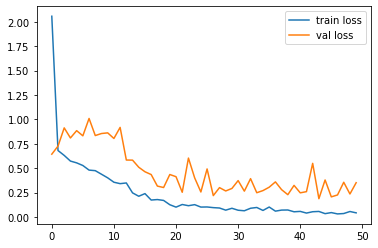

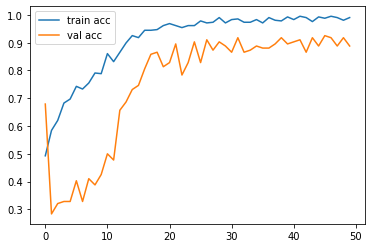

<Figure size 432x288 with 0 Axes>

In [89]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [90]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [91]:

y_pred = model.predict(test_set)


In [92]:
y_pred

array([[9.99998927e-01, 1.07442816e-06],
       [8.81202577e-04, 9.99118745e-01],
       [1.36103019e-01, 8.63896966e-01],
       [4.04910912e-04, 9.99595106e-01],
       [9.98061478e-01, 1.93852419e-03],
       [1.03383204e-02, 9.89661694e-01],
       [9.46436465e-01, 5.35634868e-02],
       [9.99997973e-01, 2.00609793e-06],
       [1.00000000e+00, 5.80897127e-22],
       [4.57655964e-03, 9.95423496e-01],
       [8.38614162e-03, 9.91613865e-01],
       [9.99999762e-01, 2.74160897e-07],
       [9.99881029e-01, 1.19007134e-04],
       [1.00000000e+00, 1.57968191e-12],
       [1.25957979e-02, 9.87404227e-01],
       [9.99998093e-01, 1.92309949e-06],
       [9.99833822e-01, 1.66109254e-04],
       [2.25962568e-02, 9.77403760e-01],
       [2.37093191e-03, 9.97629106e-01],
       [2.70612631e-03, 9.97293890e-01],
       [1.00000000e+00, 1.96975503e-09],
       [4.60564166e-01, 5.39435804e-01],
       [9.99757826e-01, 2.42124544e-04],
       [9.98452425e-01, 1.54755753e-03],
       [9.999271

In [93]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [94]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1])

In [95]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [96]:
model=load_model('model_vgg19.h5')

In [97]:
img=image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_191.png',target_size=(224,224))



In [98]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [99]:
x.shape

(224, 224, 3)

In [100]:
x=x/255

In [101]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [102]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [103]:
a=np.argmax(model.predict(img_data), axis=1)

In [104]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
